In [12]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl

df = pd.read_csv("menu.csv", encoding = 'utf-8') #parsing csv
df

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),6.7 oz (190 g),340,100,11.0,17,6.0,29,0.0,...,53,18,1,2,43,8,10,0,25,6
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),14.2 oz (403 g),810,290,32.0,50,15.0,76,1.0,...,114,38,2,9,103,21,20,0,60,6


In [2]:
df.isnull().values.any() # we don't have NaNs so sliding widnow method isn't needed

False

In [3]:
def ctable(value):
    color = 'black'
    try: 
        if value > 25 and value in df['Total Fat'].tolist():
            color = 'green'
        elif value < 15 and value in df['Total Fat'].tolist():
            color = 'red'
    except:
        color = 'black'
    return 'color: %s' % color
s = df.head(10)[['Category','Item','Calories','Total Fat']]
s = s.sort_values(by='Total Fat', ascending = False).reset_index(drop = True).style.applymap(ctable,subset = ['Total Fat'])
s

,Category,Item,Calories,Total Fat
0,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",520,30.000000
1,Breakfast,Sausage McMuffin with Egg,450,28.000000
2,Breakfast,"Bacon, Egg & Cheese Biscuit (Regular Biscuit)",460,26.000000
3,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (Large Biscuit)",470,25.000000
4,Breakfast,Sausage McMuffin,370,23.000000
5,Breakfast,Sausage McMuffin with Egg Whites,400,23.000000
6,Breakfast,Steak & Egg McMuffin,430,23.000000
7,Breakfast,"Bacon, Egg & Cheese Biscuit with Egg Whites (Regular Biscuit)",410,20.000000
8,Breakfast,Egg McMuffin,300,13.000000
9,Breakfast,Egg White Delight,250,8.000000


In [8]:
def low_fat_calories(dataframe): #selecting low calories food
    new_df = df.sort_values(by=['Calories']).loc[(df['Total Fat']<10) & (df['Calories']<350 ),['Category','Item','Calories','Total Fat']]
    return new_df

low_fat_calories(df)


,Category,Item,Calories,Total Fat
125,Beverages,Diet Dr Pepper (Child),0,0.0
138,Coffee & Tea,Iced Tea (Medium),0,0.0
137,Coffee & Tea,Iced Tea (Small),0,0.0
136,Beverages,Dasani Water Bottle,0,0.0
145,Coffee & Tea,Coffee (Small),0,0.0
...,...,...,...,...
237,Smoothies & Shakes,Strawberry Banana Smoothie (Large),330,1.0
234,Smoothies & Shakes,Blueberry Pomegranate Smoothie (Large),340,1.0
240,Smoothies & Shakes,Mango Pineapple Smoothie (Large),340,1.0
194,Coffee & Tea,Hot Chocolate with Nonfat Milk (Medium),340,3.5


In [9]:
def select_odd_sorted_fat(dataframe): #selecting odd indexes and sotring by calories 
    new_df = df.sort_values(by=['Calories'], ascending=False).iloc[df.index%2 != 0,[1,3,5]]
    return new_df
select_odd_sorted_fat(df)

,Item,Calories,Total Fat
32,Big Breakfast with Hotcakes (Large Biscuit),1150,60.0
34,Big Breakfast with Hotcakes and Egg Whites (La...,1050,50.0
81,Chicken McNuggets (20 piece),940,59.0
249,Chocolate Shake (Large),850,23.0
251,Shamrock Shake (Large),820,23.0
...,...,...,...
125,Diet Dr Pepper (Child),0,0.0
122,Diet Dr Pepper (Small),0,0.0
117,Diet Coke (Child),0,0.0
115,Diet Coke (Medium),0,0.0


In [5]:
def high_calories_sugars(dataframe):
    new_df = dataframe[(dataframe['Calories']>= 500) | (dataframe['Sugars']>= 100)]
    return new_df
high_calories_sugars(df)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
7,Breakfast,"Bacon, Egg & Cheese Biscuit (Large Biscuit)",5.8 oz (164 g),520,270,30.0,47,14.0,68,0.0,...,43,14,3,12,4,19,15,8,20,20
12,Breakfast,Sausage Biscuit with Egg (Regular Biscuit),5.7 oz (163 g),510,290,33.0,50,14.0,71,0.0,...,36,12,2,6,2,18,6,0,10,20
13,Breakfast,Sausage Biscuit with Egg (Large Biscuit),6.2 oz (177 g),570,330,37.0,57,15.0,74,0.0,...,42,14,3,11,3,18,10,0,10,20
15,Breakfast,Sausage Biscuit with Egg Whites (Large Biscuit),6.4 oz (181 g),520,280,32.0,49,13.0,65,0.0,...,40,13,3,11,3,18,4,0,8,15
18,Breakfast,Steak & Egg Biscuit (Regular Biscuit),7.1 oz (201 g),540,290,32.0,49,16.0,78,1.0,...,38,13,2,8,3,25,10,2,20,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Smoothies & Shakes,McFlurry with M&M’s Candies (Small),10.9 oz (310 g),650,210,23.0,35,14.0,72,0.5,...,96,32,1,6,89,13,15,0,45,8
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),16.2 oz (460 g),930,290,33.0,50,20.0,102,1.0,...,139,46,2,7,128,20,25,0,70,10
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),10.1 oz (285 g),510,150,17.0,26,9.0,44,0.5,...,80,27,1,4,64,12,15,0,40,8
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),13.4 oz (381 g),690,200,23.0,35,12.0,58,1.0,...,106,35,1,5,85,15,20,0,50,10


In [10]:
def extreme(dataframe): #selecting top 10 extreme higv values of holesterol and sugars. Can be useful for diabetics 
    new_df1 = dataframe.sort_values(by='Cholesterol', ascending = False)[['Category','Item','Total Fat','Cholesterol','Sugars']]
    new_df2 = dataframe.sort_values(by='Sugars', ascending = False)[['Category','Item','Total Fat','Cholesterol','Sugars']]
    result_df = pd.concat([new_df1.head(10),new_df2.head(10)])
    return result_df.loc[result_df.index %2 == 0]
extreme(df)

,Category,Item,Total Fat,Cholesterol,Sugars
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),60.0,575,17
28,Breakfast,Big Breakfast (Large Biscuit),52.0,555,3
26,Breakfast,"Steak, Egg & Cheese Bagel",35.0,295,7
18,Breakfast,Steak & Egg Biscuit (Regular Biscuit),32.0,280,3
24,Breakfast,"Bacon, Egg & Cheese Bagel",31.0,275,7
22,Breakfast,"Sausage, Egg & Cheese McGriddles",31.0,265,15
246,Smoothies & Shakes,Strawberry Shake (Large),24.0,90,123
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),32.0,60,103
248,Smoothies & Shakes,Chocolate Shake (Medium),20.0,75,97
250,Smoothies & Shakes,Shamrock Shake (Medium),19.0,75,93


AxesSubplot(0.125,0.125;0.775x0.755)


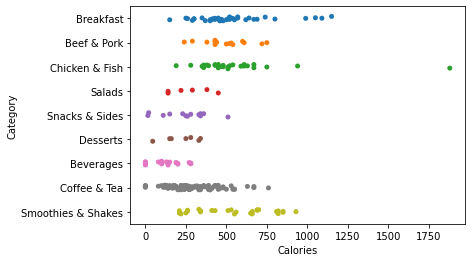

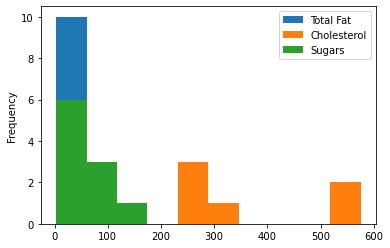

In [13]:
sns.stripplot(x = 'Calories', y = 'Category', data = df)
print(extreme(df).plot.hist())